<IPython.core.display.Javascript object>

1/1 [==============================] - 1s 1s/step
This image has a 13.51 percent confidence of being a banana.
This image has a 14.14 percent confidence of being a blueberry.
This image has a 13.42 percent confidence of being a cucumber.
This image has a 13.49 percent confidence of being a granny_smith.
This image has a 13.33 percent confidence of being a orange.
This image has a 32.11 percent confidence of being a strawberry.
The model predicts the image as: strawberry


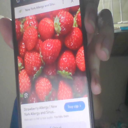

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 48ms/step
This image has a 35.22 percent confidence of being a banana.
This image has a 12.96 percent confidence of being a blueberry.
This image has a 12.96 percent confidence of being a cucumber.
This image has a 12.96 percent confidence of being a granny_smith.
This image has a 12.96 percent confidence of being a orange.
This image has a 12.96 percent confidence of being a strawberry.
The model predicts the image as: banana


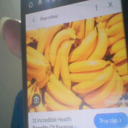

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 50ms/step
This image has a 35.05 percent confidence of being a banana.
This image has a 12.97 percent confidence of being a blueberry.
This image has a 12.98 percent confidence of being a cucumber.
This image has a 12.98 percent confidence of being a granny_smith.
This image has a 13.05 percent confidence of being a orange.
This image has a 12.97 percent confidence of being a strawberry.
The model predicts the image as: banana


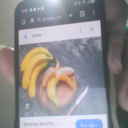

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 49ms/step
This image has a 12.96 percent confidence of being a banana.
This image has a 35.21 percent confidence of being a blueberry.
This image has a 12.96 percent confidence of being a cucumber.
This image has a 12.96 percent confidence of being a granny_smith.
This image has a 12.96 percent confidence of being a orange.
This image has a 12.96 percent confidence of being a strawberry.
The model predicts the image as: blueberry


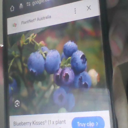

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 47ms/step
This image has a 12.96 percent confidence of being a banana.
This image has a 35.21 percent confidence of being a blueberry.
This image has a 12.96 percent confidence of being a cucumber.
This image has a 12.96 percent confidence of being a granny_smith.
This image has a 12.96 percent confidence of being a orange.
This image has a 12.96 percent confidence of being a strawberry.
The model predicts the image as: blueberry


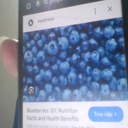

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 47ms/step
This image has a 12.96 percent confidence of being a banana.
This image has a 12.96 percent confidence of being a blueberry.
This image has a 35.17 percent confidence of being a cucumber.
This image has a 12.98 percent confidence of being a granny_smith.
This image has a 12.96 percent confidence of being a orange.
This image has a 12.96 percent confidence of being a strawberry.
The model predicts the image as: cucumber


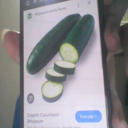

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 48ms/step
This image has a 13.95 percent confidence of being a banana.
This image has a 13.43 percent confidence of being a blueberry.
This image has a 30.29 percent confidence of being a cucumber.
This image has a 15.48 percent confidence of being a granny_smith.
This image has a 13.43 percent confidence of being a orange.
This image has a 13.42 percent confidence of being a strawberry.
The model predicts the image as: cucumber


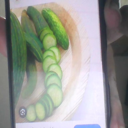

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 45ms/step
This image has a 12.96 percent confidence of being a banana.
This image has a 12.96 percent confidence of being a blueberry.
This image has a 12.96 percent confidence of being a cucumber.
This image has a 35.22 percent confidence of being a granny_smith.
This image has a 12.96 percent confidence of being a orange.
This image has a 12.96 percent confidence of being a strawberry.
The model predicts the image as: granny_smith


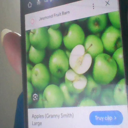

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 45ms/step
This image has a 12.96 percent confidence of being a banana.
This image has a 12.96 percent confidence of being a blueberry.
This image has a 12.96 percent confidence of being a cucumber.
This image has a 12.96 percent confidence of being a granny_smith.
This image has a 35.22 percent confidence of being a orange.
This image has a 12.96 percent confidence of being a strawberry.
The model predicts the image as: orange


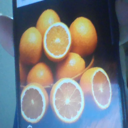

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 44ms/step
This image has a 16.43 percent confidence of being a banana.
This image has a 15.28 percent confidence of being a blueberry.
This image has a 17.87 percent confidence of being a cucumber.
This image has a 16.26 percent confidence of being a granny_smith.
This image has a 19.69 percent confidence of being a orange.
This image has a 14.48 percent confidence of being a strawberry.
The model predicts the image as: orange


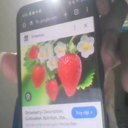

Loop completed.


In [2]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet_v3 import preprocess_input
from keras.models import load_model
from IPython.display import display, Javascript, HTML
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import io

# Define a function to capture image from camera
def capture_image():
    # Function to display a button to capture the image
    def take_photo(filename='photo.jpg', quality=0.8):
        js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        return filename

    # Capture image
    filename = take_photo()
    return filename

# Load your trained model (assumed to be MobileNetV3-based)
model = load_model('/content/model_sorting_fruit.h5')

# Define your categories
categories = ['banana', 'blueberry', 'cucumber', 'granny_smith', 'orange', 'strawberry']  # Replace with actual category names

# Run the loop 10 times
for _ in range(10):
    # Capture image from camera
    image_path = capture_image()

    # Load and preprocess the captured image using PIL
    with Image.open(image_path) as img:
        img = img.resize((128, 128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

    # Use MobileNetV3-specific preprocessing
    img_array = preprocess_input(img_array)

    # Predict the class of the image
    predictions = model.predict(img_array)

    # Calculate the softmax scores for each class
    scores = tf.nn.softmax(predictions[0])

    # Print the confidence for each category
    for i, category in enumerate(categories):
        print(f"This image has a {scores[i] * 100:.2f} percent confidence of being a {category}.")

    # Get the class label
    predicted_class = categories[np.argmax(predictions)]

    print(f'The model predicts the image as: {predicted_class}')

    # Display the captured image using PIL
    display(img)

print("Loop completed.")
